In [1]:
import pandas as pd
url =  'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [2]:
# Filter the 4 largest cities
largest_cities = df[df['SizeRank'].isin([0, 1, 2, 3])].copy()
largest_cities.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [3]:
# Melt data to long form
melted_df = pd.melt(largest_cities, id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName','State','Metro','CountyName'],
                    var_name='Date', value_name='HomeValue')
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   HomeValue   1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


In [4]:
# Filling in Nulls
mean_HomeValue = melted_df['HomeValue'].mean()
melted_df['HomeValue'].fillna(mean_HomeValue, inplace=True)
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   HomeValue   1092 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


In [5]:
# Convert the melted dates into datetime datatype
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%Y-%m-%d')
# Make the datetime column the index
melted_df.set_index('Date', inplace=True)
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   HomeValue   1092 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB


In [6]:
resampled_df = melted_df.groupby(['RegionName', pd.Grouper(freq='M')])['HomeValue'].mean().unstack()
resampled_df.head(5)

Date,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
RegionName,,,,,,,,,,,,,,,,,,,,,
Chicago,166139.0,166536.0,167368.0,168826.0,170499.0,172008.0,173598.0,175282.0,176928.0,178634.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
Houston,109068.0,109079.0,108878.0,108881.0,108834.0,109066.0,109287.0,109631.0,110062.0,110310.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
Los Angeles,234181.0,234401.0,235513.0,237589.0,240113.0,242421.0,244805.0,247479.0,249984.0,252045.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
New York,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,272045.0,274610.0,277439.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0


Part 2

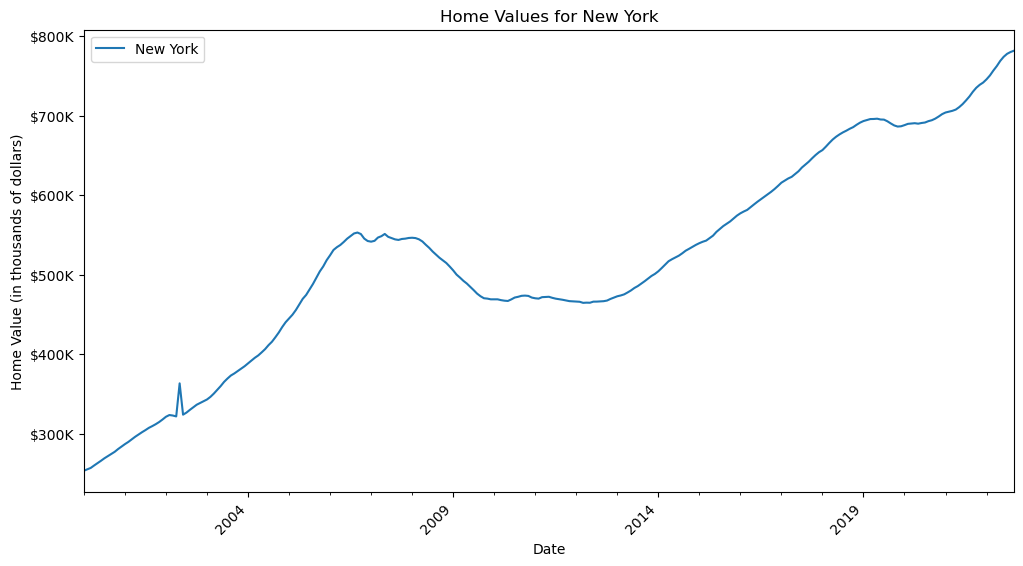

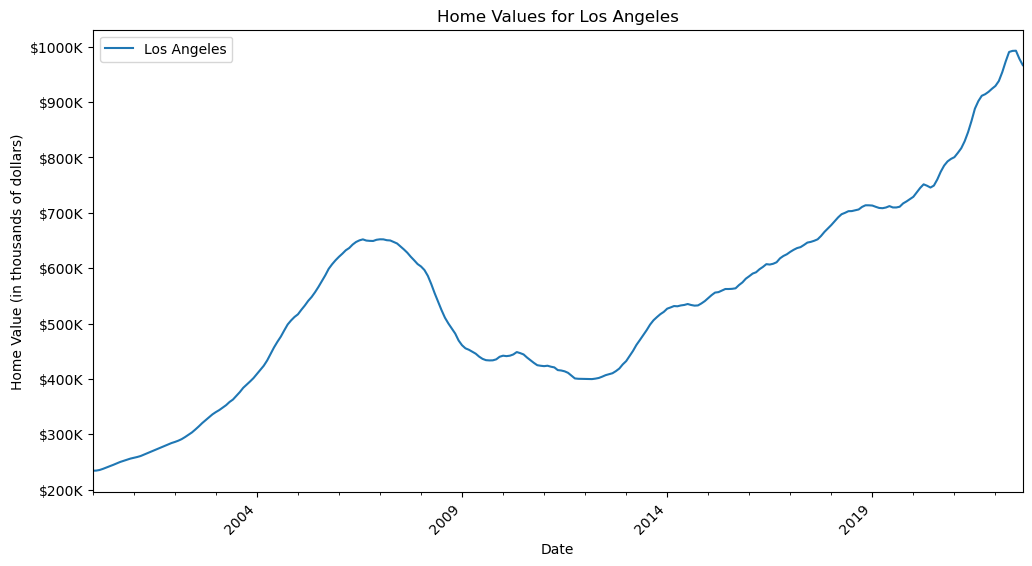

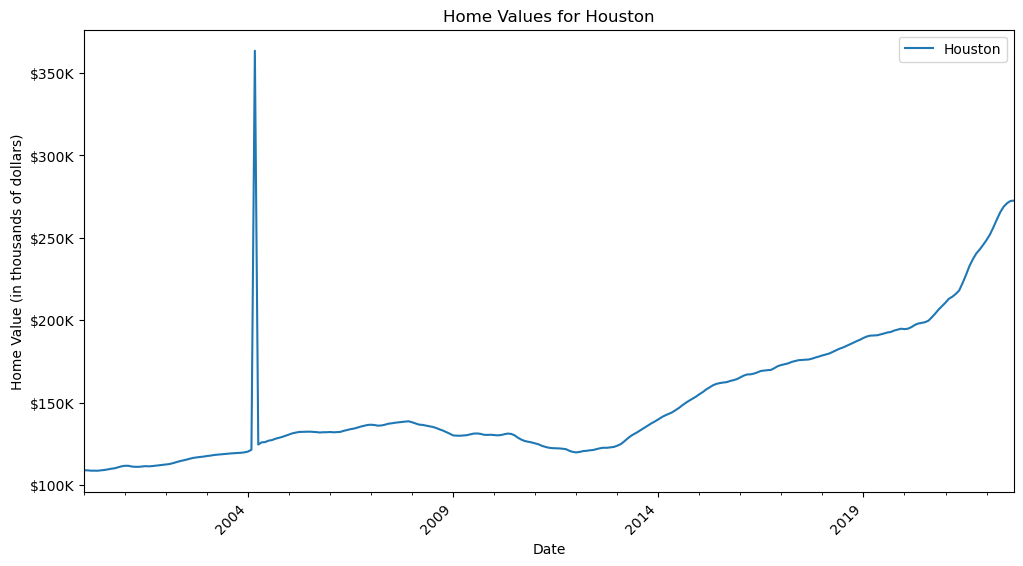

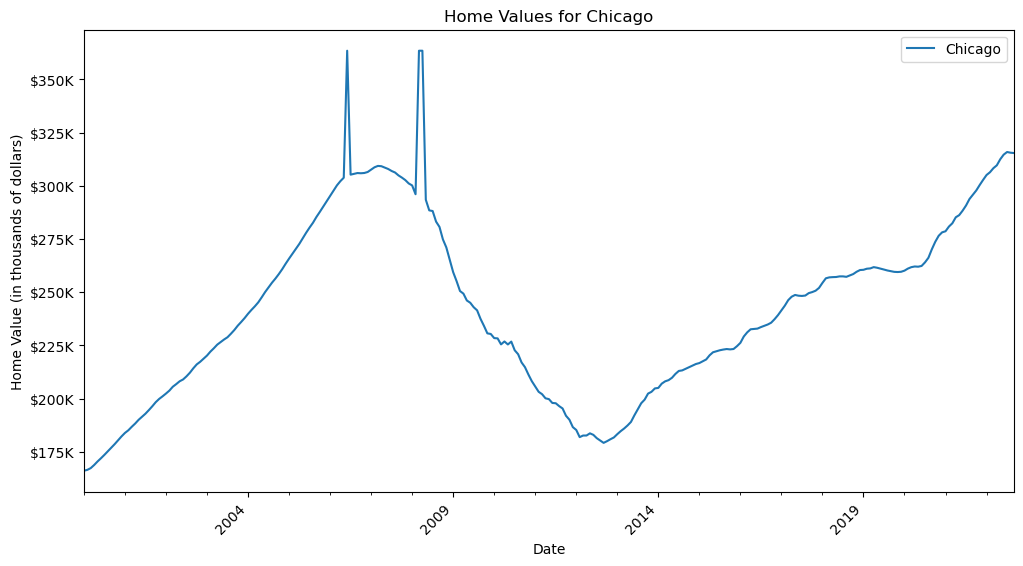

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Create a separate plot for each region
for region in melted_df['RegionName'].unique():
    region_data = melted_df[melted_df['RegionName'] == region]
    
    # Plot for each region
    fig, ax = plt.subplots(figsize=(12, 6))
    region_data.plot(y='HomeValue', ax=ax, label=region)

    # Add title and axis labels
    plt.title(f'Home Values for {region}')
    plt.xlabel('Date')
    plt.ylabel('Home Value (in thousands of dollars)')

    # Reformat y-axis ticks to use thousands of dollars
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1000:.0f}K"))

    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.legend()
    plt.show()

In [8]:
resampled_df.head(5)

Date,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
RegionName,,,,,,,,,,,,,,,,,,,,,
Chicago,166139.0,166536.0,167368.0,168826.0,170499.0,172008.0,173598.0,175282.0,176928.0,178634.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
Houston,109068.0,109079.0,108878.0,108881.0,108834.0,109066.0,109287.0,109631.0,110062.0,110310.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
Los Angeles,234181.0,234401.0,235513.0,237589.0,240113.0,242421.0,244805.0,247479.0,249984.0,252045.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
New York,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,272045.0,274610.0,277439.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0


In [10]:
# Convert the 'Date' column to datetime objects
resampled_df.columns = pd.to_datetime(resampled_df.columns)

# Select the row corresponding to the end of 2008
end_of_2008_values = resampled_df['2008-12-31']

# Find the city with the highest and least typical home values
max_value_city = end_of_2008_values.idxmax()
min_value_city = end_of_2008_values.idxmin()

print(f"City with the highest Typical Home Value at the end of 2008: {max_value_city}")
print(f"City with the least Typical Home Value at the end of 2008: {min_value_city}")

City with the highest Typical Home Value at the end of 2008: New York
City with the least Typical Home Value at the end of 2008: Houston


In [11]:
# Convert the 'Date' column to datetime objects
resampled_df.columns = pd.to_datetime(resampled_df.columns)

# Select the rows corresponding to November and December 2008
november_2008_values = resampled_df['2008-11-30']
december_2008_values = resampled_df['2008-12-31']

# Calculate the change in home values
change_in_home_values = december_2008_values - november_2008_values

print("Change in Home Values from November to December 2008:")
print(change_in_home_values)

Change in Home Values from November to December 2008:
RegionName
Chicago        -5753.0
Houston         -964.0
Los Angeles   -12611.0
New York       -4458.0
dtype: float64
